<a href="https://colab.research.google.com/github/aksg87/ADPKD-TKV-Segmentation/blob/master/Bland%E2%80%93Altman_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import sample

def bland_altman_plot(
    predicted, truth, percent=True, title="Bland-Altman Plot"
):
    
    truth = np.asarray(truth)
    predicted = np.asarray(predicted)
    diff = (truth - predicted)
    if percent:
        diff = np.divide(diff, truth)

    fig, ax = plt.subplots()
    # Note: if no technique is superior truth can be the mean of the two techniques
    ax = sns.scatterplot(truth, 100*diff)
    ax.set(
        xlabel="ground truth (mL)", ylabel="%Difference from truth", title=title
    )

    avg = 100*np.mean(diff)
    sd_1_96 = 100*(diff.std(ddof=1) * 1.96)
    print(f"mid {avg}  sd {sd_1_96}")
    ax.axhline(avg, c=".2", ls='dashed', label=f"mean ({avg:.1f}%)")
    ax.axhline(avg + sd_1_96, ls=":", c=".2", label=f"± 1.96 std (±{sd_1_96:.1f}%)")
    ax.axhline(avg - sd_1_96, ls=":", c=".2")

    ax.legend()
    plt.legend(loc='lower right', fontsize='10')

    return ax

In [6]:
# generate some dummy data
ground_truth = np.random.uniform(low=0.0, high=100.0, size=100)
predicted = np.random.uniform(low=0.0, high=100.0, size=100)

mid -418.2674193964598  sd 5494.237302946329


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


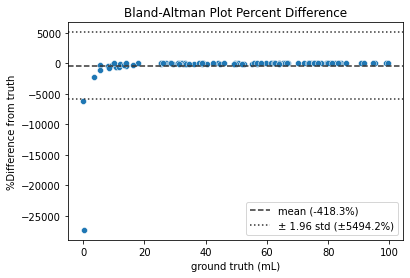

In [7]:
bland_altman_plot(predicted, ground_truth, percent=True, title="Bland-Altman Plot Percent Difference")

mid -385.8776110518608  sd 7425.109893937252


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


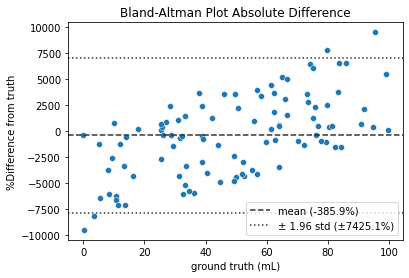

In [8]:
bland_altman_plot(predicted, ground_truth, percent=False, title="Bland-Altman Plot Absolute Difference")